In [1]:
# Install packages
%pip install networkx
%pip install numpy
%pip install tqdm
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\brand\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\brand\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\brand\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\brand\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [2]:
# The starter code is short and simple, take a look!
from starter import *

C:\Users\brand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Phase 1 - Create Inputs

In [ ]:
# Add edges with G.add_edge(u, v, weight=w)
# Idea: consider making the inputs with a solution in mind, 
# such that you know the solution when the outputs are released

def small(G: nx.Graph):
    # TODO add edges to complete the small input
    pass
    
def medium(G: nx.Graph):
    # TODO add edges to complete the medium input
    pass
    
def large(G: nx.Graph):
    # TODO add edges to complete the large input
    pass

In [ ]:
G = nx.empty_graph(N_SMALL)
small(G)
write_input(G, 'small.in')

G = nx.empty_graph(N_MEDIUM)
medium(G)
write_input(G, 'medium.in')

G = nx.empty_graph(N_LARGE)
large(G)
write_input(G, 'large.in')

# Phase 2 - Implement your Solver

In [3]:
import random
# G = read_input('/Users/bryceharrell/Desktop/170/170-proj/inputs/small1.in')
# print(random.sample(G.nodes, 10))
# teamCount = random.randint(1, len(G.nodes) // 5)
# print(teamCount)
# teamSize = len(G.nodes) // teamCount
# print(teamSize)




In [4]:
import copy
def removeNodes(List, toRemove):
    for node in toRemove:
        List.remove(node)
    return List
        

def randomTeamSample(G, teamCount):
    nodes = copy.copy(list(G))
    #teamCount = random.randint(1, len(nodes) // 6)
    #print("Team Count: " + str(teamCount))
    teamSize = len(nodes) // teamCount
    #print("Team Size: " + str(teamSize))
    for teamNum in range(1, teamCount + 1):
        verts = random.sample(nodes, teamSize)
        nodes = removeNodes(nodes, verts)
        for v in verts:
            G.nodes[v]['team'] = teamNum
    
    for remainingNode in nodes:
        G.nodes[remainingNode]['team'] = random.randint(1, teamCount)
    
    return G

def getNeighbors(G, currentTeamCount):
    neighbors = []
    

    for v in G.nodes():
        otherVert = random.sample(G.nodes(), 1)
        if (v != otherVert):
            copyG = copy.copy(G)
            team1 = copyG.nodes[v]['team']
            team2 = copyG.nodes[otherVert[0]]['team']
            copyG.nodes[v]['team'] = team2
            copyG.nodes[otherVert[0]]['team'] = team1
            #print("Swapping " + str(v) + "from team " + str(team1) + " with " + str(otherVert) + " from team " + str(team2))
        neighbors.append(copyG)

    if (currentTeamCount > 1):
        oneLess = randomTeamSample(G, currentTeamCount - 1)
        for v in oneLess.nodes():
            otherVert = random.sample(oneLess.nodes(), 1)
            if (v != otherVert):
                copyG = copy.copy(oneLess)
                team1 = copyG.nodes[v]['team']
                team2 = copyG.nodes[otherVert[0]]['team']
                copyG.nodes[v]['team'] = team2
                copyG.nodes[otherVert[0]]['team'] = team1
                #print("Swapping " + str(v) + "from team " + str(team1) + " with " + str(otherVert) + " from team " + str(team2))
            neighbors.append(copyG)

    oneMore = randomTeamSample(G, currentTeamCount + 1)
    for v in oneMore.nodes():
        otherVert = random.sample(oneMore.nodes(), 1)
        if (v != otherVert):
            copyG = copy.copy(oneMore)
            team1 = copyG.nodes[v]['team']
            team2 = copyG.nodes[otherVert[0]]['team']
            copyG.nodes[v]['team'] = team2
            copyG.nodes[otherVert[0]]['team'] = team1
            #print("Swapping " + str(v) + "from team " + str(team1) + " with " + str(otherVert) + " from team " + str(team2))
        neighbors.append(copyG)
    #print(len(neighbors))
    return neighbors

def getTeamCount(G):
    teams = set()
    for v in G.nodes:
        if (G.nodes[v]['team'] not in teams):
            teams.add(G.nodes[v]['team'])
    return len(teams)

    


In [5]:
# randomTeamSample(G, 10)
# neighbors = getNeighbors(G, 10)
#for n in neighbors:
    #print(getTeamCount(n))

#getTeamCount(G)
#validate_output(G)
#visualize(G)
#score(G)

In [16]:

def simulated_annealing(G, k):
    initialTemp = 100
    finalTemp = 1
    alpha = 20
    scores = []

    currentTemp = initialTemp


    # define the starting solution as a random assignment of penguins to teams
    currentTeamCount = random.randint(1, 10)
    # currentTeamCount = random.randint(1, len(G.nodes) // 6)
    current_solution = randomTeamSample(G, currentTeamCount)
    
    

    while currentTemp > finalTemp:
        # choose a random solution from the neighborhood of the current solution
        # print("Current Team Count: " + str(currentTeamCount))
        neighbors = getNeighbors(current_solution, currentTeamCount)
        next_solution = random.sample(neighbors, 1)
        # print(next_solution == current_solution)
        next_solution = next_solution[0]
        nextTeamCount = getTeamCount(next_solution)
        # print("Next Team Count: " + str(nextTeamCount))



        # evaluate the cost of the new solution
        current_cost = score(current_solution)
        # print("Current Cost: " + str(current_cost))
        next_cost = score(next_solution)
        # print("Next Cost: " + str(next_cost))
        scores.append(current_cost)

        # accept the new solution if it has a lower cost
        if next_cost < current_cost:
            current_solution = next_solution
            currentTeamCount = nextTeamCount
        else:
            # print("Running else")
            # accept the new solution with probability exp(-ΔE / kT)
            p = np.exp(-(next_cost - current_cost) / (k * currentTemp))
            if random.uniform(0, 1) < p:
                current_solution = next_solution
                currentTeamCount = nextTeamCount
        currentTemp -= alpha

    # return the approximate solution found by the algorithm
    # print(current_cost)
    # print(min(scores))
    # print(getTeamCount(current_solution))






def solve(G: nx.Graph):
    # TODO implement this function with your solver
    # Assign a team to v with G.nodes[v]['team'] = team_id
    # Access the team of v with team_id = G.nodes[v]['team']
    # create a graph from the input data


    # define the temperature schedule and the constant k
    T = [100, 10, 1, 0.1, 0.01, 0.001]
    k = 1

    # find the approximate solution to the problem
    simulated_annealing(G, k)


    pass

C:\Users\brand\AppData\Local\Temp\ipykernel_7596\797937519.py:30: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  otherVert = random.sample(G.nodes(), 1)
C:\Users\brand\AppData\Local\Temp\ipykernel_7596\797937519.py:43: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  otherVert = random.sample(oneLess.nodes(), 1)
C:\Users\brand\AppData\Local\Temp\ipykernel_7596\797937519.py:55: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  otherVert = random.sample(oneMore.nodes(), 1)


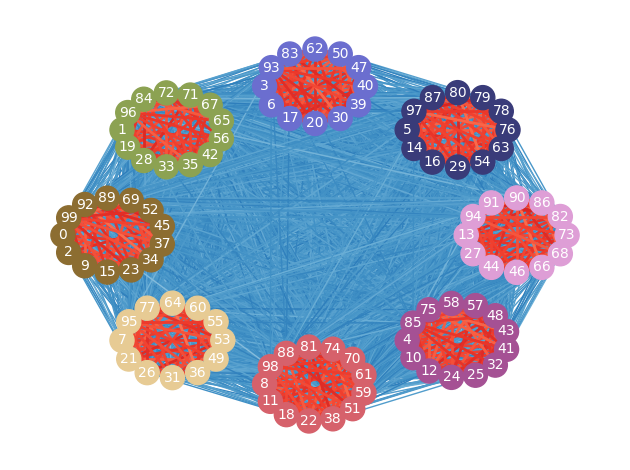

409812.5061018658

In [17]:
G = read_input('./inputs/small1.in')
solve(G)
validate_output(G)
visualize(G)
score(G)

In [18]:
run(solve, './inputs/small1.in', './outputs/small1.out', overwrite=True)

./inputs/small1.in: cost 2346620.579480672


C:\Users\brand\AppData\Local\Temp\ipykernel_7596\797937519.py:30: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  otherVert = random.sample(G.nodes(), 1)
C:\Users\brand\AppData\Local\Temp\ipykernel_7596\797937519.py:43: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  otherVert = random.sample(oneLess.nodes(), 1)
C:\Users\brand\AppData\Local\Temp\ipykernel_7596\797937519.py:55: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  otherVert = random.sample(oneMore.nodes(), 1)


In [19]:
run_all(solve, 'inputs', 'outputs', overwrite=True)
tar('outputs')

  0%|          | 0/780 [00:00<?, ?it/s]C:\Users\brand\AppData\Local\Temp\ipykernel_7596\797937519.py:30: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  otherVert = random.sample(G.nodes(), 1)
C:\Users\brand\AppData\Local\Temp\ipykernel_7596\797937519.py:43: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  otherVert = random.sample(oneLess.nodes(), 1)
C:\Users\brand\AppData\Local\Temp\ipykernel_7596\797937519.py:55: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  otherVert = random.sample(oneMore.nodes(), 1)
  0%|          | 1/780 [00:00<04:20,  2.99it/s]

inputs\large1.in: cost 3.831008000716577e+24


  0%|          | 2/780 [00:00<05:28,  2.37it/s]

inputs\large10.in: cost 1.236279959951699e+36


  0%|          | 3/780 [00:01<05:11,  2.50it/s]

inputs\large100.in: cost 5.118122037182254e+28


  1%|          | 4/780 [00:01<05:12,  2.48it/s]

inputs\large101.in: cost 1465227890.1285932


  1%|          | 5/780 [00:02<05:18,  2.43it/s]

inputs\large102.in: cost 2.7585134545231705e+35


  1%|          | 6/780 [00:02<05:00,  2.57it/s]

inputs\large103.in: cost 1465211082.1285932


  1%|          | 7/780 [00:02<04:48,  2.68it/s]

inputs\large104.in: cost 1.6948892444103337e+30


  1%|          | 8/780 [00:03<04:48,  2.67it/s]

inputs\large105.in: cost 1.7392749415205015e+20


  1%|          | 9/780 [00:03<04:23,  2.93it/s]

inputs\large106.in: cost 101470.44943837206


  1%|▏         | 10/780 [00:03<04:39,  2.75it/s]

inputs\large107.in: cost 6.155075488793533e+34


  1%|▏         | 11/780 [00:04<04:15,  3.01it/s]

inputs\large108.in: cost 393133429721405.5


  2%|▏         | 12/780 [00:04<04:28,  2.86it/s]

inputs\large109.in: cost 3.880846962436207e+19


  2%|▏         | 13/780 [00:04<04:28,  2.86it/s]

inputs\large11.in: cost 48516568541.97903


  2%|▏         | 14/780 [00:05<04:16,  2.99it/s]

inputs\large110.in: cost 9971578.31606508


  2%|▏         | 15/780 [00:05<04:34,  2.79it/s]

inputs\large111.in: cost 1.0148003881138887e+35


  2%|▏         | 16/780 [00:05<04:33,  2.79it/s]

inputs\large112.in: cost 1.301879120512798e+16


  2%|▏         | 17/780 [00:06<04:30,  2.82it/s]

inputs\large113.in: cost 2.3538526683702055e+19


  2%|▏         | 18/780 [00:06<04:42,  2.70it/s]

inputs\large114.in: cost 1.236279959951699e+36


  2%|▏         | 19/780 [00:06<04:18,  2.94it/s]

inputs\large115.in: cost 131881587249.84764


  3%|▎         | 20/780 [00:07<04:21,  2.91it/s]

inputs\large116.in: cost 5.834617425275749e+16


  3%|▎         | 21/780 [00:07<04:06,  3.08it/s]

inputs\large117.in: cost 4.7278394682293466e+20


  3%|▎         | 22/780 [00:07<04:07,  3.06it/s]

inputs\large118.in: cost 5.834617425281025e+16


  3%|▎         | 23/780 [00:08<04:27,  2.83it/s]

inputs\large119.in: cost 3.10429793570192e+28


  3%|▎         | 24/780 [00:08<04:25,  2.85it/s]

inputs\large12.in: cost 2.1188706471076388e+21


  3%|▎         | 25/780 [00:08<04:08,  3.04it/s]

inputs\large120.in: cost 3.4485635021385364e+26


  3%|▎         | 26/780 [00:09<04:25,  2.84it/s]

inputs\large121.in: cost 1.739274941520501e+20


  3%|▎         | 27/780 [00:09<04:14,  2.96it/s]

inputs\large122.in: cost 542478.1891324173


  4%|▎         | 28/780 [00:09<04:32,  2.76it/s]

inputs\large123.in: cost 3.4042760499317406e+31


  4%|▎         | 29/780 [00:10<04:23,  2.84it/s]

inputs\large124.in: cost 2.54816291780264e+27


  4%|▍         | 30/780 [00:10<04:04,  3.06it/s]

inputs\large125.in: cost 6.39843493530055e+19


  4%|▍         | 31/780 [00:10<04:10,  2.98it/s]

inputs\large126.in: cost 4.7278394682293466e+20


  4%|▍         | 32/780 [00:11<03:58,  3.14it/s]

inputs\large127.in: cost 4.607186634331292e+30


  4%|▍         | 33/780 [00:11<03:44,  3.33it/s]

inputs\large128.in: cost 1465086969.1285932


  4%|▍         | 34/780 [00:11<04:06,  3.03it/s]

inputs\large129.in: cost 3.144682864669655e+23


  4%|▍         | 35/780 [00:12<03:53,  3.19it/s]

inputs\large13.in: cost 1.391249812950831e+29


  5%|▍         | 36/780 [00:12<04:06,  3.02it/s]

inputs\large130.in: cost 1.0148003881138887e+35


  5%|▍         | 37/780 [00:12<04:17,  2.89it/s]

inputs\large131.in: cost 6.155075488793533e+34


  5%|▍         | 38/780 [00:13<04:15,  2.90it/s]

inputs\large132.in: cost 1.6948892444103337e+30


  5%|▌         | 39/780 [00:13<03:57,  3.12it/s]

inputs\large133.in: cost 4.9875093266256084e+38


  5%|▌         | 40/780 [00:13<04:14,  2.91it/s]

inputs\large134.in: cost 2.7585134545231705e+35


  5%|▌         | 41/780 [00:14<04:19,  2.85it/s]

inputs\large135.in: cost 1.9321599304403446e+18


  5%|▌         | 42/780 [00:14<04:01,  3.06it/s]

inputs\large136.in: cost 4.311231547115296e+17


  6%|▌         | 43/780 [00:14<04:09,  2.96it/s]

inputs\large137.in: cost 4.5480198079848416e+35


  6%|▌         | 44/780 [00:15<04:12,  2.92it/s]

inputs\large138.in: cost 3.53887435612972e+16


  6%|▌         | 45/780 [00:15<04:11,  2.93it/s]

inputs\large139.in: cost 2.4831346783006825e+37


  6%|▌         | 46/780 [00:15<03:55,  3.11it/s]

inputs\large14.in: cost 1.6948892444103337e+30


  6%|▌         | 47/780 [00:16<03:58,  3.07it/s]

inputs\large140.in: cost 87719925258591.78


  6%|▌         | 48/780 [00:16<04:01,  3.03it/s]

inputs\large141.in: cost 7.016735912097631e+22


  6%|▋         | 49/780 [00:16<03:59,  3.05it/s]

inputs\large142.in: cost 2.3236238100390024e+24


  6%|▋         | 50/780 [00:17<03:47,  3.20it/s]

inputs\large143.in: cost 2.7943999487401856e+30


  7%|▋         | 51/780 [00:17<04:12,  2.88it/s]

inputs\large144.in: cost 7.6947852651420175e+25


  7%|▋         | 52/780 [00:17<03:54,  3.11it/s]

inputs\large145.in: cost 591052219299.5447


  7%|▋         | 53/780 [00:18<03:59,  3.03it/s]

inputs\large146.in: cost 2.515438670919167e+32


  7%|▋         | 54/780 [00:18<04:03,  2.99it/s]

inputs\large147.in: cost 4.3112315471158586e+17


  7%|▋         | 55/780 [00:18<03:52,  3.11it/s]

inputs\large148.in: cost 1.673122985398114e+35


  7%|▋         | 56/780 [00:19<04:01,  2.99it/s]

inputs\large149.in: cost 5.54062238439351e+36


  7%|▋         | 57/780 [00:19<03:49,  3.15it/s]

inputs\large15.in: cost 1068647458168520.9


  7%|▋         | 58/780 [00:19<03:55,  3.06it/s]

inputs\large150.in: cost 1465241204.2064102


  8%|▊         | 59/780 [00:20<04:12,  2.85it/s]

inputs\large151.in: cost 3.4485635021385364e+26


  8%|▊         | 60/780 [00:20<04:00,  2.99it/s]

inputs\large152.in: cost 9.496119420602448e+21


  8%|▊         | 61/780 [00:20<04:07,  2.90it/s]

inputs\large153.in: cost 48516597693.97903


  8%|▊         | 62/780 [00:21<03:58,  3.00it/s]

inputs\large154.in: cost 2.038281066512669e+36


  8%|▊         | 63/780 [00:21<04:01,  2.97it/s]

inputs\large155.in: cost 9.374167502150271e+26


  8%|▊         | 64/780 [00:21<04:07,  2.90it/s]

inputs\large156.in: cost 2.4831346783006825e+37


  8%|▊         | 65/780 [00:22<04:08,  2.88it/s]

inputs\large157.in: cost 7.794889495725307e+20


  8%|▊         | 66/780 [00:22<04:26,  2.68it/s]

inputs\large158.in: cost 3.493427105748509e+21


  9%|▊         | 67/780 [00:22<04:05,  2.90it/s]

inputs\large159.in: cost 528872.1382425799


  9%|▊         | 68/780 [00:23<03:56,  3.00it/s]

inputs\large16.in: cost 1414473.9365062346


  9%|▉         | 69/780 [00:23<04:09,  2.85it/s]

inputs\large160.in: cost 2.038281066512669e+36


  9%|▉         | 70/780 [00:23<03:59,  2.96it/s]

inputs\large161.in: cost 2.54816291780264e+27


  9%|▉         | 71/780 [00:24<04:16,  2.76it/s]

inputs\large162.in: cost 8.548134287298057e+23


  9%|▉         | 72/780 [00:25<05:14,  2.25it/s]

inputs\large163.in: cost 449409.0425986584


  9%|▉         | 73/780 [00:25<04:54,  2.40it/s]

inputs\large164.in: cost 3.1855931757114486e+18


  9%|▉         | 74/780 [00:25<04:48,  2.44it/s]

inputs\large165.in: cost 10094086.421176735


 10%|▉         | 75/780 [00:26<05:33,  2.12it/s]

inputs\large166.in: cost 8.223012714622913e+38


 10%|▉         | 76/780 [00:26<05:30,  2.13it/s]

inputs\large167.in: cost 19572961040878.145


 10%|▉         | 77/780 [00:27<04:58,  2.35it/s]

inputs\large168.in: cost 7896296018305482.0


 10%|█         | 78/780 [00:27<04:51,  2.41it/s]

inputs\large169.in: cost 1.156864174916083e+23


 10%|█         | 79/780 [00:27<04:37,  2.53it/s]

inputs\large17.in: cost 5.052393630276104e+33


 10%|█         | 80/780 [00:28<04:20,  2.69it/s]

inputs\large170.in: cost 974480365874.347


 10%|█         | 81/780 [00:28<04:23,  2.65it/s]

inputs\large171.in: cost 82312.71200465198


 11%|█         | 82/780 [00:28<04:12,  2.76it/s]

inputs\large172.in: cost 3.831008000716577e+24


 11%|█         | 83/780 [00:29<04:04,  2.85it/s]

inputs\large173.in: cost 393133429719127.5


 11%|█         | 84/780 [00:29<04:04,  2.85it/s]

inputs\large174.in: cost 5.759687576887954e+21


 11%|█         | 85/780 [00:30<04:59,  2.32it/s]

inputs\large175.in: cost 3845320.5281165307


 11%|█         | 86/780 [00:30<04:40,  2.47it/s]

inputs\large176.in: cost 1.9321599304402982e+18


 11%|█         | 87/780 [00:30<04:29,  2.58it/s]

inputs\large177.in: cost 1.236279959951699e+36


 11%|█▏        | 88/780 [00:31<04:15,  2.71it/s]

inputs\large178.in: cost 1.8348021439163853e+38


 11%|█▏        | 89/780 [00:31<04:02,  2.85it/s]

inputs\large179.in: cost 591052225603.5737


 12%|█▏        | 90/780 [00:31<04:15,  2.70it/s]

inputs\large18.in: cost 1.5656454077855836e+22


 12%|█▏        | 91/780 [00:32<04:17,  2.67it/s]

inputs\large180.in: cost 44434814.48120729


 12%|█▏        | 92/780 [00:32<04:12,  2.73it/s]

inputs\large181.in: cost 2.54816291780264e+27


 12%|█▏        | 93/780 [00:33<04:27,  2.57it/s]

inputs\large182.in: cost 1786584.987473495


 12%|█▏        | 94/780 [00:33<04:15,  2.69it/s]

inputs\large183.in: cost 1.8348021439163853e+38


 12%|█▏        | 95/780 [00:33<03:57,  2.88it/s]

inputs\large184.in: cost 1.171914237280291e+18


 12%|█▏        | 96/780 [00:34<04:15,  2.68it/s]

inputs\large185.in: cost 2.867579591680572e+20


 12%|█▏        | 97/780 [00:34<04:09,  2.73it/s]

inputs\large186.in: cost 2415575343.6349635


 13%|█▎        | 98/780 [00:34<04:20,  2.62it/s]

inputs\large187.in: cost 1.858671745284128e+33


 13%|█▎        | 99/780 [00:35<04:14,  2.67it/s]

inputs\large188.in: cost 16349093.480244676


 13%|█▎        | 100/780 [00:35<03:54,  2.90it/s]

inputs\large189.in: cost 92872.31591025766


 13%|█▎        | 101/780 [00:36<04:05,  2.77it/s]

inputs\large19.in: cost 4.0939969621274545e+37


 13%|█▎        | 102/780 [00:36<03:59,  2.83it/s]

inputs\large190.in: cost 3982738894.1312985


 13%|█▎        | 103/780 [00:36<03:59,  2.83it/s]

inputs\large191.in: cost 53204824074981.305


 13%|█▎        | 104/780 [00:37<03:54,  2.88it/s]

inputs\large192.in: cost 9.619657855455419e+16


 13%|█▎        | 105/780 [00:37<03:46,  2.99it/s]

inputs\large193.in: cost 7200489943141.588


 14%|█▎        | 106/780 [00:37<03:53,  2.88it/s]

inputs\large194.in: cost 103125.39523749404


 14%|█▎        | 107/780 [00:38<04:05,  2.75it/s]

inputs\large195.in: cost 79990324874.89362


 14%|█▍        | 108/780 [00:38<04:40,  2.39it/s]

inputs\large196.in: cost 5.252155228592584e+18


 14%|█▍        | 109/780 [00:39<04:32,  2.47it/s]

inputs\large197.in: cost 9.374167502150271e+26


 14%|█▍        | 110/780 [00:39<04:44,  2.35it/s]

inputs\large198.in: cost 8.223012714622913e+38


 14%|█▍        | 111/780 [00:39<04:31,  2.46it/s]

inputs\large199.in: cost 5.759687576887954e+21


 14%|█▍        | 112/780 [00:40<04:35,  2.42it/s]

inputs\large2.in: cost 327187010.50407416


 14%|█▍        | 113/780 [00:40<04:37,  2.41it/s]

inputs\large20.in: cost 4.5480198079848416e+35


 15%|█▍        | 114/780 [00:41<04:36,  2.41it/s]

inputs\large200.in: cost 262002.78135317253


 15%|█▍        | 115/780 [00:41<04:19,  2.57it/s]

inputs\large201.in: cost 1.8348021439163853e+38


 15%|█▍        | 116/780 [00:42<05:30,  2.01it/s]

inputs\large202.in: cost 9.374167502150271e+26


 15%|█▌        | 117/780 [00:42<04:54,  2.25it/s]

inputs\large203.in: cost 7.016735912097631e+22


 15%|█▌        | 118/780 [00:42<04:22,  2.53it/s]

inputs\large204.in: cost 147194.49299143502


 15%|█▌        | 119/780 [00:43<04:30,  2.44it/s]

inputs\large205.in: cost 73123205.05587582


 15%|█▌        | 120/780 [00:43<04:07,  2.67it/s]

inputs\large206.in: cost 1068647458167260.8


 16%|█▌        | 121/780 [00:43<04:11,  2.62it/s]

inputs\large207.in: cost 1.4276838118129203e+19


 16%|█▌        | 122/780 [00:44<03:53,  2.82it/s]

inputs\large208.in: cost 1.0413759433029088e+25


 16%|█▌        | 123/780 [00:44<03:40,  2.97it/s]

inputs\large209.in: cost 10825525543.094563


 16%|█▌        | 124/780 [00:44<03:43,  2.94it/s]

inputs\large21.in: cost 1.1128637547917595e+38


 16%|█▌        | 125/780 [00:45<03:32,  3.08it/s]

inputs\large210.in: cost 3.7332419967990015e+34


 16%|█▌        | 126/780 [00:45<04:00,  2.72it/s]

inputs\large211.in: cost 3.831008000716577e+24


 16%|█▋        | 127/780 [00:45<03:50,  2.83it/s]

inputs\large212.in: cost 7.498416996990121e+35


 16%|█▋        | 128/780 [00:46<04:10,  2.61it/s]

inputs\large213.in: cost 2.6148941144463526e+17


 17%|█▋        | 129/780 [00:47<05:28,  1.98it/s]

inputs\large214.in: cost 683073.5071833075


 17%|█▋        | 130/780 [00:48<09:31,  1.14it/s]

inputs\large215.in: cost 2.5813128861900675e+22


 17%|█▋        | 131/780 [00:49<08:36,  1.26it/s]

inputs\large216.in: cost 44268140.48120729


 17%|█▋        | 132/780 [00:49<07:12,  1.50it/s]

inputs\large217.in: cost 1068647458227667.8


 17%|█▋        | 133/780 [00:50<06:12,  1.74it/s]

inputs\large218.in: cost 2.038281066512669e+36


 17%|█▋        | 134/780 [00:50<05:31,  1.95it/s]

inputs\large219.in: cost 5.685719999335932e+26


 17%|█▋        | 135/780 [00:51<05:11,  2.07it/s]

inputs\large22.in: cost 393133429720215.5


 17%|█▋        | 136/780 [00:51<04:51,  2.21it/s]

inputs\large220.in: cost 1.5060973145850306e+37


 18%|█▊        | 137/780 [00:51<04:30,  2.38it/s]

inputs\large221.in: cost 1.156864174916083e+23


 18%|█▊        | 138/780 [00:52<04:30,  2.38it/s]

inputs\large222.in: cost 1.4276838118129302e+19


 18%|█▊        | 139/780 [00:52<04:17,  2.49it/s]

inputs\large223.in: cost 9.134941978066843e+36


 18%|█▊        | 140/780 [00:52<04:10,  2.56it/s]

inputs\large224.in: cost 2.830753303274694e+25


 18%|█▊        | 141/780 [00:53<03:49,  2.78it/s]

inputs\large225.in: cost 32270357050171.14


 18%|█▊        | 142/780 [00:53<03:32,  3.00it/s]

inputs\large226.in: cost 1.5860134523135114e+17


 18%|█▊        | 143/780 [00:53<03:35,  2.96it/s]

inputs\large227.in: cost 7.6947852651420175e+25


 18%|█▊        | 144/780 [00:54<03:37,  2.92it/s]

inputs\large228.in: cost 1761901795143794.8


 19%|█▊        | 145/780 [00:54<03:28,  3.04it/s]

inputs\large229.in: cost 2.29378315946961e+29


 19%|█▊        | 146/780 [00:54<03:30,  3.01it/s]

inputs\large23.in: cost 9.619657855449462e+16


 19%|█▉        | 147/780 [00:55<03:22,  3.12it/s]

inputs\large230.in: cost 4.5480198079848416e+35


 19%|█▉        | 148/780 [00:55<03:15,  3.24it/s]

inputs\large231.in: cost 2.3538526683702006e+19


 19%|█▉        | 149/780 [00:55<03:31,  2.98it/s]

inputs\large232.in: cost 53204824101695.266


 19%|█▉        | 150/780 [00:56<03:34,  2.93it/s]

inputs\large233.in: cost 1.0148003881138887e+35


 19%|█▉        | 151/780 [00:56<03:47,  2.77it/s]

inputs\large234.in: cost 4.9875093266256084e+38


 19%|█▉        | 152/780 [00:56<03:39,  2.87it/s]

inputs\large235.in: cost 5.118122037182254e+28


 20%|█▉        | 153/780 [00:57<03:31,  2.96it/s]

inputs\large236.in: cost 7.016735912097631e+22


 20%|█▉        | 154/780 [00:57<03:49,  2.73it/s]

inputs\large237.in: cost 87719925210037.73


 20%|█▉        | 155/780 [00:57<03:32,  2.94it/s]

inputs\large238.in: cost 3.064431641699272e+33


 20%|██        | 156/780 [00:58<03:34,  2.91it/s]

inputs\large239.in: cost 1.236279959951699e+36


 20%|██        | 157/780 [00:58<03:36,  2.88it/s]

inputs\large24.in: cost 496185.4501643344


 20%|██        | 158/780 [00:59<03:48,  2.73it/s]

inputs\large240.in: cost 393133429802312.5


 20%|██        | 159/780 [00:59<03:33,  2.90it/s]

inputs\large241.in: cost 1.2523631708422138e+31


 21%|██        | 160/780 [00:59<03:45,  2.75it/s]

inputs\large242.in: cost 87719925223095.77


 21%|██        | 161/780 [01:00<03:33,  2.90it/s]

inputs\large243.in: cost 5.612702334857472e+31


 21%|██        | 162/780 [01:00<03:25,  3.00it/s]

inputs\large244.in: cost 44319677.4267256


 21%|██        | 163/780 [01:00<03:29,  2.95it/s]

inputs\large245.in: cost 4.2012104037905146e+27


 21%|██        | 164/780 [01:01<03:20,  3.07it/s]

inputs\large246.in: cost 1.0413759433029088e+25


 21%|██        | 165/780 [01:01<03:21,  3.05it/s]

inputs\large247.in: cost 10825539503.094563


 21%|██▏       | 166/780 [01:01<03:37,  2.82it/s]

inputs\large248.in: cost 1607269.90820203


 21%|██▏       | 167/780 [01:02<03:28,  2.94it/s]

inputs\large249.in: cost 125550.81500331442


 22%|██▏       | 168/780 [01:02<03:30,  2.90it/s]

inputs\large25.in: cost 1.409349082426939e+24


 22%|██▏       | 169/780 [01:02<03:33,  2.86it/s]

inputs\large250.in: cost 1.5060973145850306e+37


 22%|██▏       | 170/780 [01:03<03:39,  2.77it/s]

inputs\large251.in: cost 3.4042760499317406e+31


 22%|██▏       | 171/780 [01:03<04:27,  2.27it/s]

inputs\large252.in: cost 7.10801915464283e+17


 22%|██▏       | 172/780 [01:04<04:24,  2.30it/s]

inputs\large253.in: cost 1.0148003881138887e+35


 22%|██▏       | 173/780 [01:04<04:05,  2.48it/s]

inputs\large254.in: cost 2.54816291780264e+27


 22%|██▏       | 174/780 [01:04<03:48,  2.65it/s]

inputs\large255.in: cost 5.685719999335932e+26


 22%|██▏       | 175/780 [01:05<03:49,  2.63it/s]

inputs\large256.in: cost 2648912297985.927


 23%|██▎       | 176/780 [01:05<03:45,  2.68it/s]

inputs\large257.in: cost 1.0148003881138887e+35


 23%|██▎       | 177/780 [01:06<03:55,  2.57it/s]

inputs\large258.in: cost 1.0280022915520466e+30


 23%|██▎       | 178/780 [01:06<03:43,  2.70it/s]

inputs\large259.in: cost 591052301322.5737


 23%|██▎       | 179/780 [01:06<03:40,  2.73it/s]

inputs\large26.in: cost 1.9073465724950997e+23


 23%|██▎       | 180/780 [01:07<03:48,  2.63it/s]

inputs\large260.in: cost 2648912382457.821


 23%|██▎       | 181/780 [01:07<03:45,  2.65it/s]

inputs\large27.in: cost 1.858671745284128e+33


 23%|██▎       | 182/780 [01:07<03:31,  2.82it/s]

inputs\large28.in: cost 1606646495423.54


 23%|██▎       | 183/780 [01:08<03:48,  2.61it/s]

inputs\large29.in: cost 3.4485635021385364e+26


 24%|██▎       | 184/780 [01:08<03:40,  2.70it/s]

inputs\large3.in: cost 5.252155228592622e+18


 24%|██▎       | 185/780 [01:09<03:54,  2.54it/s]

inputs\large30.in: cost 607754.9489779717


 24%|██▍       | 186/780 [01:09<03:33,  2.79it/s]

inputs\large31.in: cost 44304854.48120729


 24%|██▍       | 187/780 [01:09<03:23,  2.92it/s]

inputs\large32.in: cost 6.926624955416095e+27


 24%|██▍       | 188/780 [01:10<03:36,  2.73it/s]

inputs\large33.in: cost 3.4042760499317406e+31


 24%|██▍       | 189/780 [01:10<03:36,  2.73it/s]

inputs\large34.in: cost 914536.2125794956


 24%|██▍       | 190/780 [01:10<03:39,  2.69it/s]

inputs\large35.in: cost 2.54816291780264e+27


 24%|██▍       | 191/780 [01:11<03:22,  2.91it/s]

inputs\large36.in: cost 3982493441.1312985


 25%|██▍       | 192/780 [01:11<03:15,  3.00it/s]

inputs\large37.in: cost 393133429759857.5


 25%|██▍       | 193/780 [01:11<03:29,  2.80it/s]

inputs\large38.in: cost 198332568.73449552


 25%|██▍       | 194/780 [01:12<03:19,  2.94it/s]

inputs\large39.in: cost 6.837671229762745e+32


 25%|██▌       | 195/780 [01:12<03:37,  2.69it/s]

inputs\large4.in: cost 1.545538935590104e+27


 25%|██▌       | 196/780 [01:12<03:36,  2.69it/s]

inputs\large40.in: cost 327176938.4760557


 25%|██▌       | 197/780 [01:13<03:24,  2.85it/s]

inputs\large41.in: cost 7896296018270071.0


 25%|██▌       | 198/780 [01:13<03:37,  2.68it/s]

inputs\large42.in: cost 53204824085103.266


 26%|██▌       | 199/780 [01:13<03:21,  2.88it/s]

inputs\large43.in: cost 120272429.71240903


 26%|██▌       | 200/780 [01:14<03:10,  3.05it/s]

inputs\large44.in: cost 110180.42360539653


 26%|██▌       | 201/780 [01:14<03:14,  2.97it/s]

inputs\large45.in: cost 4.2558654617939035e+22


 26%|██▌       | 202/780 [01:14<03:05,  3.12it/s]

inputs\large46.in: cost 7896296018277071.0


 26%|██▌       | 203/780 [01:15<03:26,  2.80it/s]

inputs\large47.in: cost 1.6948892444103337e+30


 26%|██▌       | 204/780 [01:15<03:25,  2.80it/s]

inputs\large48.in: cost 1606646575862.54


 26%|██▋       | 205/780 [01:16<03:38,  2.64it/s]

inputs\large49.in: cost 9.619657855454875e+16


 26%|██▋       | 206/780 [01:16<03:33,  2.68it/s]

inputs\large5.in: cost 2.54816291780264e+27


 27%|██▋       | 207/780 [01:16<03:23,  2.82it/s]

inputs\large50.in: cost 1.6948892444103337e+30


 27%|██▋       | 208/780 [01:17<03:20,  2.85it/s]

inputs\large51.in: cost 4.311231547115265e+17


 27%|██▋       | 209/780 [01:17<03:27,  2.76it/s]

inputs\large52.in: cost 1.0280022915520466e+30


 27%|██▋       | 210/780 [01:17<03:22,  2.81it/s]

inputs\large53.in: cost 1.9073465724950997e+23


 27%|██▋       | 211/780 [01:18<03:16,  2.90it/s]

inputs\large54.in: cost 2.5813128861900675e+22


 27%|██▋       | 212/780 [01:18<03:25,  2.77it/s]

inputs\large55.in: cost 591052284800.5447


 27%|██▋       | 213/780 [01:18<03:24,  2.78it/s]

inputs\large56.in: cost 393133429791759.5


 27%|██▋       | 214/780 [01:19<03:14,  2.91it/s]

inputs\large57.in: cost 1.7169386685189163e+25


 28%|██▊       | 215/780 [01:19<03:16,  2.87it/s]

inputs\large58.in: cost 6.2351490808116165e+29


 28%|██▊       | 216/780 [01:19<03:05,  3.04it/s]

inputs\large59.in: cost 11871600931388.395


 28%|██▊       | 217/780 [01:20<02:56,  3.19it/s]

inputs\large6.in: cost 217435971296.95053


 28%|██▊       | 218/780 [01:20<02:59,  3.12it/s]

inputs\large60.in: cost 120295429.82266387


 28%|██▊       | 219/780 [01:20<02:59,  3.13it/s]

inputs\large61.in: cost 3.493427105748509e+21


 28%|██▊       | 220/780 [01:21<03:05,  3.02it/s]

inputs\large62.in: cost 6.749859873641241e+37


 28%|██▊       | 221/780 [01:21<03:20,  2.79it/s]

inputs\large63.in: cost 1.6948892444103337e+30


 28%|██▊       | 222/780 [01:21<03:29,  2.66it/s]

inputs\large64.in: cost 4.607186634331292e+30


 29%|██▊       | 223/780 [01:22<03:31,  2.64it/s]

inputs\large65.in: cost 3982520127.0873265


 29%|██▊       | 224/780 [01:22<03:26,  2.69it/s]

inputs\large66.in: cost 2.091659496012996e+26


 29%|██▉       | 225/780 [01:23<03:34,  2.59it/s]

inputs\large67.in: cost 144625706582834.1


 29%|██▉       | 226/780 [01:23<03:21,  2.75it/s]

inputs\large68.in: cost 974480373215.4022


 29%|██▉       | 227/780 [01:23<03:06,  2.96it/s]

inputs\large69.in: cost 5.54062238439351e+36


 29%|██▉       | 228/780 [01:24<03:20,  2.76it/s]

inputs\large7.in: cost 1.0280022915520466e+30


 29%|██▉       | 229/780 [01:24<03:05,  2.97it/s]

inputs\large70.in: cost 5.052393630276104e+33


 29%|██▉       | 230/780 [01:24<03:20,  2.74it/s]

inputs\large71.in: cost 4.2012104037905146e+27


 30%|██▉       | 231/780 [01:25<03:11,  2.87it/s]

inputs\large72.in: cost 4.1472572418860906e+32


 30%|██▉       | 232/780 [01:25<03:08,  2.91it/s]

inputs\large73.in: cost 745624.1891324173


 30%|██▉       | 233/780 [01:25<03:21,  2.72it/s]

inputs\large74.in: cost 480933.78135317256


 30%|███       | 234/780 [01:26<03:27,  2.63it/s]

inputs\large75.in: cost 1.8828518748858514e+28


 30%|███       | 235/780 [01:26<03:15,  2.79it/s]

inputs\large76.in: cost 3.7332419967990015e+34


 30%|███       | 236/780 [01:26<03:13,  2.81it/s]

inputs\large77.in: cost 326918206.50407416


 30%|███       | 237/780 [01:27<03:08,  2.89it/s]

inputs\large78.in: cost 6.926624955416095e+27


 31%|███       | 238/780 [01:27<03:26,  2.62it/s]

inputs\large79.in: cost 4094551.5281165307


 31%|███       | 239/780 [01:28<03:22,  2.67it/s]

inputs\large8.in: cost 1.8828518748858514e+28


 31%|███       | 240/780 [01:28<03:28,  2.59it/s]

inputs\large80.in: cost 6126478.382125822


 31%|███       | 241/780 [01:28<03:23,  2.65it/s]

inputs\large81.in: cost 4.2558654617939035e+22


 31%|███       | 242/780 [01:29<03:23,  2.65it/s]

inputs\large82.in: cost 48516636940.97903


 31%|███       | 243/780 [01:29<03:24,  2.63it/s]

inputs\large83.in: cost 5.834617425275749e+16


 31%|███▏      | 244/780 [01:30<03:20,  2.68it/s]

inputs\large84.in: cost 144625706600480.22


 31%|███▏      | 245/780 [01:30<03:08,  2.83it/s]

inputs\large85.in: cost 3.78180908539129e+29


 32%|███▏      | 246/780 [01:30<03:24,  2.61it/s]

inputs\large86.in: cost 9.374167502150271e+26


 32%|███▏      | 247/780 [01:31<03:19,  2.67it/s]

inputs\large87.in: cost 2.830753303274694e+25


 32%|███▏      | 248/780 [01:31<03:29,  2.54it/s]

inputs\large88.in: cost 53204824146765.34


 32%|███▏      | 249/780 [01:31<03:25,  2.58it/s]

inputs\large89.in: cost 4.667123183213639e+25


 32%|███▏      | 250/780 [01:32<03:19,  2.66it/s]

inputs\large9.in: cost 1.1420073898156843e+28


 32%|███▏      | 251/780 [01:32<03:18,  2.66it/s]

inputs\large90.in: cost 326967233.4760557


 32%|███▏      | 252/780 [01:32<03:02,  2.89it/s]

inputs\large91.in: cost 29426768046.56969


 32%|███▏      | 253/780 [01:33<03:16,  2.68it/s]

inputs\large92.in: cost 2.4831346783006825e+37


 33%|███▎      | 254/780 [01:33<03:11,  2.75it/s]

inputs\large93.in: cost 1.409349082426939e+24


 33%|███▎      | 255/780 [01:34<03:20,  2.62it/s]

inputs\large94.in: cost 6.316264379003792e+24


 33%|███▎      | 256/780 [01:34<03:19,  2.63it/s]

inputs\large95.in: cost 4.5480198079848416e+35


 33%|███▎      | 257/780 [01:34<03:15,  2.68it/s]

inputs\large96.in: cost 53204824153363.2


 33%|███▎      | 258/780 [01:35<03:16,  2.66it/s]

inputs\large97.in: cost 1.5656454077855836e+22


 33%|███▎      | 259/780 [01:35<03:16,  2.66it/s]

inputs\large98.in: cost 9.496119420602448e+21


 33%|███▎      | 261/780 [01:36<02:34,  3.36it/s]

inputs\large99.in: cost 1.373382979540176e+34
inputs\medium1.in: cost 327115631.24721104


 34%|███▎      | 263/780 [01:36<01:52,  4.61it/s]

inputs\medium10.in: cost 3982619709.342954
inputs\medium100.in: cost 724515.414599937


 34%|███▍      | 265/780 [01:36<01:28,  5.83it/s]

inputs\medium101.in: cost 506222.24144560634
inputs\medium102.in: cost 120397076.2344512
inputs\medium103.in: cost 3672331.0624113875


 34%|███▍      | 268/780 [01:36<01:08,  7.46it/s]

inputs\medium104.in: cost 6566154796.667778
inputs\medium105.in: cost 753003.1040747633
inputs\medium106.in: cost 64752.20594802552


 35%|███▍      | 271/780 [01:37<01:00,  8.47it/s]

inputs\medium107.in: cost 27043729.652087446
inputs\medium108.in: cost 406869.6047309474
inputs\medium109.in: cost 3675113.0624113875


 35%|███▌      | 273/780 [01:37<00:56,  9.03it/s]

inputs\medium11.in: cost 377515.4145999371
inputs\medium110.in: cost 198363928.9376285
inputs\medium111.in: cost 917672.2175655995


 36%|███▌      | 277/780 [01:37<00:59,  8.44it/s]

inputs\medium112.in: cost 48516620540.81816
inputs\medium113.in: cost 27006523.652087446


 36%|███▌      | 278/780 [01:38<01:00,  8.26it/s]

inputs\medium114.in: cost 3692837.3808953627
inputs\medium115.in: cost 358491296217.25745


 36%|███▌      | 282/780 [01:38<00:53,  9.25it/s]

inputs\medium116.in: cost 9899578.357418273
inputs\medium117.in: cost 857263.1637632904
inputs\medium118.in: cost 7200490016616.588


 36%|███▋      | 284/780 [01:38<00:58,  8.54it/s]

inputs\medium119.in: cost 72983146.4485642
inputs\medium12.in: cost 3982593580.1944394


 37%|███▋      | 286/780 [01:39<00:59,  8.28it/s]

inputs\medium120.in: cost 878847.4096730726
inputs\medium121.in: cost 3982705443.238273
inputs\medium122.in: cost 522079.26945504255


 37%|███▋      | 288/780 [01:39<00:47, 10.27it/s]

inputs\medium123.in: cost 4367317918234.3496
inputs\medium124.in: cost 990303.5536923187


 37%|███▋      | 292/780 [01:39<00:49,  9.82it/s]

inputs\medium125.in: cost 2415559643.821866
inputs\medium126.in: cost 888631109.8528955
inputs\medium127.in: cost 539069413.2771248


 38%|███▊      | 294/780 [01:39<00:46, 10.38it/s]

inputs\medium128.in: cost 48516529971.521996
inputs\medium129.in: cost 11871600942472.965


 38%|███▊      | 296/780 [01:39<00:47, 10.17it/s]

inputs\medium13.in: cost 19572961027767.875
inputs\medium130.in: cost 974480357820.5428
inputs\medium131.in: cost 679180.8793492735


 38%|███▊      | 298/780 [01:40<00:52,  9.15it/s]

inputs\medium132.in: cost 48516631847.81816
inputs\medium133.in: cost 131881622858.01895


 39%|███▊      | 301/780 [01:40<00:54,  8.85it/s]

inputs\medium134.in: cost 6566120183.977119
inputs\medium135.in: cost 6171890.497709848
inputs\medium136.in: cost 3982490691.9368033


 39%|███▉      | 304/780 [01:40<00:58,  8.15it/s]

inputs\medium137.in: cost 1606646553962.0208
inputs\medium138.in: cost 53204824126871.09
inputs\medium139.in: cost 72986061.4485642


 39%|███▉      | 307/780 [01:41<00:52,  9.03it/s]

inputs\medium14.in: cost 62139.60473094736
inputs\medium140.in: cost 48516663173.56855


 40%|███▉      | 309/780 [01:41<00:50,  9.30it/s]

inputs\medium141.in: cost 5999420.091508039
inputs\medium142.in: cost 19572960966019.85


 40%|███▉      | 311/780 [01:41<00:49,  9.50it/s]

inputs\medium143.in: cost 68123.20594802551
inputs\medium144.in: cost 660969.1192024216


 40%|████      | 312/780 [01:41<00:51,  9.04it/s]

inputs\medium145.in: cost 284469.2059480255
inputs\medium146.in: cost 2258931.579480672
inputs\medium147.in: cost 10825614917.5769


 41%|████      | 316/780 [01:42<00:46, 10.08it/s]

inputs\medium148.in: cost 6566062915.824516
inputs\medium149.in: cost 10825547776.5769
inputs\medium15.in: cost 79990224622.7094


 41%|████      | 320/780 [01:42<00:45, 10.19it/s]

inputs\medium150.in: cost 478886.2046763928
inputs\medium151.in: cost 6209138.497709848
inputs\medium152.in: cost 591052221344.9186


 41%|████▏     | 322/780 [01:42<00:40, 11.20it/s]

inputs\medium153.in: cost 29426790597.460358
inputs\medium154.in: cost 79990244749.7094
inputs\medium155.in: cost 717414.2059480255


 42%|████▏     | 326/780 [01:43<00:43, 10.45it/s]

inputs\medium156.in: cost 16372460.076627582
inputs\medium157.in: cost 1606646490970.467
inputs\medium158.in: cost 1606646482064.7244


 42%|████▏     | 328/780 [01:43<00:46,  9.79it/s]

inputs\medium159.in: cost 6566013215.824516
inputs\medium16.in: cost 1360775.014179713


 42%|████▏     | 330/780 [01:43<00:44, 10.22it/s]

inputs\medium160.in: cost 198360928.1708678
inputs\medium161.in: cost 914155.3274847278
inputs\medium162.in: cost 591052232306.7034


 43%|████▎     | 332/780 [01:43<00:44, 10.06it/s]

inputs\medium163.in: cost 327040411.24721104
inputs\medium164.in: cost 198446390.1708678


 43%|████▎     | 335/780 [01:44<00:47,  9.33it/s]

inputs\medium165.in: cost 751278.5536923187
inputs\medium166.in: cost 6566074074.127261


 43%|████▎     | 337/780 [01:44<00:48,  9.09it/s]

inputs\medium167.in: cost 527333.3159102576
inputs\medium168.in: cost 2331482.579480672


 43%|████▎     | 339/780 [01:44<01:16,  5.77it/s]

inputs\medium169.in: cost 19572961010832.85
inputs\medium17.in: cost 198443732.78910616


 44%|████▎     | 341/780 [01:45<01:02,  7.00it/s]

inputs\medium170.in: cost 19572960986104.19
inputs\medium171.in: cost 6566011515.977119
inputs\medium172.in: cost 538998802.5248019


 44%|████▍     | 344/780 [01:45<00:49,  8.74it/s]

inputs\medium173.in: cost 7200489942224.588
inputs\medium174.in: cost 3982604122.1944394


 44%|████▍     | 347/780 [01:45<00:43,  9.86it/s]

inputs\medium175.in: cost 217436005475.10214
inputs\medium176.in: cost 4367317940975.3496
inputs\medium177.in: cost 358491301033.6379


 45%|████▍     | 349/780 [01:45<00:42, 10.10it/s]

inputs\medium178.in: cost 6566007044.667778
inputs\medium179.in: cost 539212050.2286543
inputs\medium18.in: cost 87719925169045.3


 45%|████▌     | 353/780 [01:46<00:46,  9.28it/s]

inputs\medium180.in: cost 326953557.24721104
inputs\medium181.in: cost 521253.3630425104
inputs\medium182.in: cost 2415663868.8662925
inputs\medium183.in: cost 2415589279.971193


 46%|████▌     | 356/780 [01:46<00:58,  7.30it/s]

inputs\medium184.in: cost 538995400.0802135
inputs\medium185.in: cost 431902.4145999371


 46%|████▌     | 358/780 [01:47<00:53,  7.86it/s]

inputs\medium186.in: cost 591052253576.3843
inputs\medium187.in: cost 16452884.076627582


 46%|████▌     | 359/780 [01:47<00:56,  7.50it/s]

inputs\medium188.in: cost 120282674.2344512
inputs\medium189.in: cost 3982497027.238273
inputs\medium19.in: cost 79990358424.86075


 47%|████▋     | 363/780 [01:47<00:50,  8.20it/s]

inputs\medium190.in: cost 11871601033404.941
inputs\medium191.in: cost 326926138.24721104


 47%|████▋     | 366/780 [01:47<00:45,  9.11it/s]

inputs\medium192.in: cost 2648912290947.515
inputs\medium193.in: cost 7200489943076.588
inputs\medium194.in: cost 19572960962909.03


 47%|████▋     | 368/780 [01:48<00:50,  8.17it/s]

inputs\medium195.in: cost 358491427574.10016
inputs\medium196.in: cost 1465207572.5561862


 47%|████▋     | 370/780 [01:48<01:22,  4.96it/s]

inputs\medium197.in: cost 6566098033.667778
inputs\medium198.in: cost 539171223.0802135


 48%|████▊     | 372/780 [01:49<01:22,  4.95it/s]

inputs\medium199.in: cost 6109395.497709848
inputs\medium2.in: cost 217436135357.78128


 48%|████▊     | 374/780 [01:49<01:14,  5.48it/s]

inputs\medium20.in: cost 209851.10407476325
inputs\medium200.in: cost 2415538658.4871383


 48%|████▊     | 376/780 [01:49<01:08,  5.86it/s]

inputs\medium201.in: cost 358491383205.74036
inputs\medium202.in: cost 2415664259.2664127


 48%|████▊     | 377/780 [01:50<01:08,  5.84it/s]

inputs\medium203.in: cost 48516642540.521996
inputs\medium204.in: cost 146882.2046763928


 49%|████▉     | 381/780 [01:50<00:50,  7.96it/s]

inputs\medium205.in: cost 1021830.0838560899
inputs\medium206.in: cost 9913773.357418273
inputs\medium207.in: cost 1465086648.3654618


 49%|████▉     | 383/780 [01:50<00:48,  8.19it/s]

inputs\medium208.in: cost 6566010608.127261
inputs\medium209.in: cost 131881712844.01895


 49%|████▉     | 385/780 [01:50<00:42,  9.34it/s]

inputs\medium21.in: cost 70462.10407476328
inputs\medium210.in: cost 208099.2414456063
inputs\medium211.in: cost 66689.6478572415


 50%|████▉     | 388/780 [01:51<00:44,  8.86it/s]

inputs\medium212.in: cost 11871600961037.35
inputs\medium213.in: cost 3982616268.342954


 50%|█████     | 390/780 [01:51<00:48,  8.01it/s]

inputs\medium214.in: cost 9900278.357418273
inputs\medium215.in: cost 4367317956401.3496


 50%|█████     | 392/780 [01:51<00:52,  7.41it/s]

inputs\medium216.in: cost 79990288449.86075
inputs\medium217.in: cost 10067284.357418273


 51%|█████     | 394/780 [01:52<00:46,  8.34it/s]

inputs\medium218.in: cost 209805.2414456063
inputs\medium219.in: cost 974480459958.9879


 51%|█████     | 396/780 [01:52<00:49,  7.75it/s]

inputs\medium22.in: cost 1465090527.3654618
inputs\medium220.in: cost 217436022678.26544


 51%|█████     | 398/780 [01:52<01:13,  5.19it/s]

inputs\medium221.in: cost 79990311006.01018
inputs\medium222.in: cost 7200490075739.588


 51%|█████▏    | 400/780 [01:53<01:01,  6.21it/s]

inputs\medium223.in: cost 6566143823.824516
inputs\medium224.in: cost 591052237106.3843
inputs\medium225.in: cost 44263325.32786617


 52%|█████▏    | 402/780 [01:53<00:47,  7.89it/s]

inputs\medium226.in: cost 17848290105.49898
inputs\medium227.in: cost 3654551.888428957
inputs\medium228.in: cost 11871600921393.283


 52%|█████▏    | 408/780 [01:53<00:32, 11.28it/s]

inputs\medium229.in: cost 17848245820.98488
inputs\medium23.in: cost 591052225305.9186
inputs\medium230.in: cost 1465089854.3654618
inputs\medium231.in: cost 2648912222836.515


 53%|█████▎    | 410/780 [01:54<00:35, 10.44it/s]

inputs\medium232.in: cost 26862693.652087446
inputs\medium233.in: cost 429991.0381249469


 53%|█████▎    | 412/780 [01:54<00:35, 10.42it/s]

inputs\medium234.in: cost 3993109.888428957
inputs\medium235.in: cost 87719925137879.16
inputs\medium236.in: cost 519610.645090896


 53%|█████▎    | 414/780 [01:54<00:35, 10.42it/s]

inputs\medium237.in: cost 402079.8793492735
inputs\medium238.in: cost 1363889.549840703


 53%|█████▎    | 416/780 [01:54<00:36,  9.95it/s]

inputs\medium239.in: cost 4367317918029.3496
inputs\medium24.in: cost 87719925201735.89


 54%|█████▎    | 419/780 [01:55<00:41,  8.66it/s]

inputs\medium240.in: cost 44409986.01052309
inputs\medium241.in: cost 17848401769.029423


 54%|█████▍    | 421/780 [01:55<00:44,  8.05it/s]

inputs\medium242.in: cost 888750283.4076264
inputs\medium243.in: cost 3982678442.4910064
inputs\medium244.in: cost 591052221694.4656


 54%|█████▍    | 423/780 [01:55<00:38,  9.36it/s]

inputs\medium245.in: cost 6566024066.276023
inputs\medium246.in: cost 326918863.24721104


 55%|█████▍    | 426/780 [01:55<00:38,  9.10it/s]

inputs\medium247.in: cost 120318741.2344512
inputs\medium248.in: cost 539128699.930712


 55%|█████▍    | 428/780 [01:55<00:33, 10.43it/s]

inputs\medium249.in: cost 7200489940709.588
inputs\medium25.in: cost 44270914.32786617
inputs\medium250.in: cost 1606646575527.0208


 55%|█████▌    | 431/780 [01:56<00:39,  8.76it/s]

inputs\medium251.in: cost 120286093.38273332
inputs\medium252.in: cost 7200490023211.588


 56%|█████▌    | 434/780 [01:57<00:55,  6.29it/s]

inputs\medium253.in: cost 755113.5536923187
inputs\medium254.in: cost 214570.40967307266
inputs\medium255.in: cost 356345.85625402443


 56%|█████▌    | 436/780 [01:57<00:47,  7.28it/s]

inputs\medium256.in: cost 79990228749.7094
inputs\medium257.in: cost 1603179.45975111
inputs\medium258.in: cost 902310.4842225594


 56%|█████▋    | 439/780 [01:57<00:46,  7.29it/s]

inputs\medium259.in: cost 481839.24144560634
inputs\medium26.in: cost 32270357115041.688


 57%|█████▋    | 441/780 [01:57<00:42,  7.92it/s]

inputs\medium260.in: cost 44303740.47978042
inputs\medium27.in: cost 1465205888.5561862


 57%|█████▋    | 443/780 [01:58<00:44,  7.53it/s]

inputs\medium28.in: cost 29426857658.460358
inputs\medium29.in: cost 888824683.1035398


 57%|█████▋    | 445/780 [01:58<00:43,  7.68it/s]

inputs\medium3.in: cost 684470.6047309474
inputs\medium30.in: cost 358491391288.9445


 57%|█████▋    | 447/780 [01:58<00:37,  8.79it/s]

inputs\medium31.in: cost 1465104236.3654618
inputs\medium32.in: cost 19572961027887.72


 58%|█████▊    | 449/780 [01:58<00:40,  8.27it/s]

inputs\medium33.in: cost 708515.414599937
inputs\medium34.in: cost 29426902220.460358
inputs\medium35.in: cost 151283.55369231876


 58%|█████▊    | 452/780 [01:59<00:37,  8.73it/s]

inputs\medium36.in: cost 1672774.549840703
inputs\medium37.in: cost 6118192.346610527


 58%|█████▊    | 455/780 [01:59<00:35,  9.11it/s]

inputs\medium38.in: cost 6566021622.824516
inputs\medium39.in: cost 2229764.579480672
inputs\medium4.in: cost 73069451.4485642


 58%|█████▊    | 456/780 [01:59<00:37,  8.56it/s]

inputs\medium40.in: cost 1465263144.3654618
inputs\medium41.in: cost 73470.80470941328


 59%|█████▉    | 459/780 [02:00<00:38,  8.29it/s]

inputs\medium42.in: cost 6566231915.667778
inputs\medium43.in: cost 388215.5536923188


 59%|█████▉    | 461/780 [02:00<00:38,  8.33it/s]

inputs\medium44.in: cost 591052246153.9186
inputs\medium45.in: cost 1606646535065.169
inputs\medium46.in: cost 29426769607.310333


 59%|█████▉    | 463/780 [02:00<00:31, 10.04it/s]

inputs\medium47.in: cost 539055850.3766893
inputs\medium48.in: cost 32270357113950.22


 60%|█████▉    | 466/780 [02:00<00:35,  8.74it/s]

inputs\medium49.in: cost 16445548.536110554
inputs\medium5.in: cost 358491296763.1872
inputs\medium50.in: cost 72966638.64019486


 60%|██████    | 470/780 [02:01<00:31,  9.93it/s]

inputs\medium51.in: cost 155744.0381249469
inputs\medium52.in: cost 2648912286581.515
inputs\medium53.in: cost 538985850.3766893


 61%|██████    | 472/780 [02:01<00:31,  9.89it/s]

inputs\medium54.in: cost 6100349.646990211
inputs\medium55.in: cost 2415583329.2664127
inputs\medium56.in: cost 120332911.2344512


 61%|██████    | 476/780 [02:01<00:29, 10.39it/s]

inputs\medium57.in: cost 141247.41459993707
inputs\medium58.in: cost 79990233749.86075
inputs\medium59.in: cost 131881695623.1871
inputs\medium6.in: cost 538983816.0802135


 61%|██████▏   | 478/780 [02:01<00:33,  8.89it/s]

inputs\medium60.in: cost 10825682776.5769
inputs\medium61.in: cost 9957671.357418273


 62%|██████▏   | 482/780 [02:02<00:32,  9.30it/s]

inputs\medium62.in: cost 888757536.8528955
inputs\medium63.in: cost 131881595901.01895
inputs\medium64.in: cost 346688.24144560634


 62%|██████▏   | 484/780 [02:02<00:30,  9.56it/s]

inputs\medium65.in: cost 26858062.652087446
inputs\medium66.in: cost 32270357179118.914


 62%|██████▏   | 486/780 [02:02<00:32,  8.98it/s]

inputs\medium67.in: cost 1209915.5536923187
inputs\medium68.in: cost 11871600944284.994
inputs\medium69.in: cost 358491296317.25745


 63%|██████▎   | 488/780 [02:03<00:31,  9.14it/s]

inputs\medium7.in: cost 11871601016314.941
inputs\medium70.in: cost 3982495443.086964
inputs\medium71.in: cost 32270357154310.76


 63%|██████▎   | 492/780 [02:03<00:30,  9.34it/s]

inputs\medium72.in: cost 3660007.888428957
inputs\medium73.in: cost 73087998.4485642


 63%|██████▎   | 494/780 [02:03<00:33,  8.64it/s]

inputs\medium74.in: cost 6163223.646990211
inputs\medium75.in: cost 358491490616.79047


 63%|██████▎   | 495/780 [02:03<00:31,  8.93it/s]

inputs\medium76.in: cost 4367317946128.3496
inputs\medium77.in: cost 522836.1192024216


 64%|██████▍   | 499/780 [02:04<00:32,  8.55it/s]

inputs\medium78.in: cost 48516529013.81816
inputs\medium79.in: cost 29426820607.310333
inputs\medium8.in: cost 29426863145.310333


 64%|██████▍   | 501/780 [02:04<00:34,  8.02it/s]

inputs\medium80.in: cost 395593.31591025763
inputs\medium81.in: cost 1465085544.3654618


 65%|██████▍   | 504/780 [02:04<00:30,  9.19it/s]

inputs\medium82.in: cost 17848341481.184277
inputs\medium83.in: cost 72967638.64019486
inputs\medium84.in: cost 6026473.346610527


 65%|██████▍   | 506/780 [02:05<00:31,  8.60it/s]

inputs\medium85.in: cost 87719925140179.16
inputs\medium86.in: cost 237495.41459993707


 65%|██████▌   | 508/780 [02:05<00:29,  9.07it/s]

inputs\medium87.in: cost 4367317927394.3496
inputs\medium88.in: cost 17848343594.573418


 65%|██████▌   | 510/780 [02:05<00:29,  9.24it/s]

inputs\medium89.in: cost 44274832.47978042
inputs\medium9.in: cost 6195448.346610527
inputs\medium90.in: cost 163003.10407476325


 66%|██████▌   | 512/780 [02:05<00:25, 10.43it/s]

inputs\medium91.in: cost 326911402.24721104


 66%|██████▌   | 514/780 [02:06<00:46,  5.75it/s]

inputs\medium92.in: cost 888756873.4076264
inputs\medium93.in: cost 383743.415780998
inputs\medium94.in: cost 264470.6047309474


 66%|██████▋   | 517/780 [02:06<00:38,  6.91it/s]

inputs\medium95.in: cost 327097505.24721104
inputs\medium96.in: cost 539105975.3766893
inputs\medium97.in: cost 974480366627.9879


 67%|██████▋   | 521/780 [02:07<00:29,  8.72it/s]

inputs\medium98.in: cost 53204824075683.09
inputs\medium99.in: cost 217435968361.00876
inputs\small1.in: cost 287904.1111595124


 67%|██████▋   | 525/780 [02:07<00:23, 11.03it/s]

inputs\small10.in: cost 270053.8702032812
inputs\small100.in: cost 581462.5061018658
inputs\small101.in: cost 1446348.5147984258
inputs\small102.in: cost 926271.0385297296


 68%|██████▊   | 528/780 [02:07<00:18, 13.66it/s]

inputs\small103.in: cost 2220388.579480672
inputs\small104.in: cost 3738807.8133055954
inputs\small105.in: cost 2392647.579480672
inputs\small106.in: cost 58440.31591025766
inputs\small107.in: cost 162347.41592657613


 68%|██████▊   | 534/780 [02:07<00:14, 16.82it/s]

inputs\small108.in: cost 528729.3082045388
inputs\small109.in: cost 628261.1432152335
inputs\small11.in: cost 209812.7284434279
inputs\small110.in: cost 3824559.2242079442


 69%|██████▉   | 539/780 [02:08<00:12, 18.94it/s]

inputs\small111.in: cost 278414.8164039266
inputs\small112.in: cost 198612.31591025766
inputs\small113.in: cost 97374.3428342066
inputs\small114.in: cost 736007.9971278271
inputs\small115.in: cost 525090.3082045388


 69%|██████▉   | 542/780 [02:08<00:11, 20.92it/s]

inputs\small116.in: cost 109520.3428342066
inputs\small117.in: cost 838288.0385297296
inputs\small118.in: cost 342293.795933395
inputs\small119.in: cost 408346.01581064693
inputs\small12.in: cost 69561.31591025766


 70%|███████   | 548/780 [02:08<00:10, 21.19it/s]

inputs\small120.in: cost 582463.8702032813
inputs\small121.in: cost 167665.8164039266
inputs\small122.in: cost 83113.85383914743
inputs\small123.in: cost 407012.1432152336
inputs\small124.in: cost 472072.16036641074


 71%|███████   | 554/780 [02:08<00:10, 20.75it/s]

inputs\small125.in: cost 153242.8164039266
inputs\small126.in: cost 91407.79776051317
inputs\small127.in: cost 169693.64785724148
inputs\small128.in: cost 240895.01581064696
inputs\small129.in: cost 509652.5825633703


 71%|███████▏  | 557/780 [02:08<00:10, 20.36it/s]

inputs\small13.in: cost 366805.8164039266
inputs\small130.in: cost 201028.85383914743
inputs\small131.in: cost 214210.89804638777
inputs\small132.in: cost 250817.11115951242
inputs\small133.in: cost 322707.5825633703


 72%|███████▏  | 562/780 [02:09<00:17, 12.49it/s]

inputs\small134.in: cost 234470.31591025766
inputs\small135.in: cost 269787.8164039266
inputs\small136.in: cost 526097.3505456051
inputs\small137.in: cost 914091.0385297296


 73%|███████▎  | 568/780 [02:09<00:12, 16.88it/s]

inputs\small138.in: cost 882162.0385297296
inputs\small139.in: cost 565191.9923435062
inputs\small14.in: cost 58823.31591025766
inputs\small140.in: cost 469840.8538391474
inputs\small141.in: cost 58723.87020328127
inputs\small142.in: cost 98930.1111595124


 74%|███████▎  | 574/780 [02:09<00:10, 20.04it/s]

inputs\small143.in: cost 837057.3049321878
inputs\small144.in: cost 377687.6779456785
inputs\small145.in: cost 57302.64785724149
inputs\small146.in: cost 183723.8164039266
inputs\small147.in: cost 178122.41592657613
inputs\small148.in: cost 248810.89804638777


 74%|███████▍  | 578/780 [02:10<00:08, 22.57it/s]

inputs\small149.in: cost 89347.41592657614
inputs\small15.in: cost 104813.77548060444
inputs\small150.in: cost 195384.01581064696
inputs\small151.in: cost 286611.1424357402
inputs\small152.in: cost 210795.7284434279


 75%|███████▍  | 584/780 [02:10<00:09, 21.29it/s]

inputs\small153.in: cost 1550976.5157861614
inputs\small154.in: cost 161012.14321523352
inputs\small155.in: cost 160841.64785724148
inputs\small156.in: cost 438333.6478572415


 76%|███████▌  | 590/780 [02:11<00:13, 14.09it/s]

inputs\small157.in: cost 213914.14243574018
inputs\small158.in: cost 3677566.439458316
inputs\small159.in: cost 522750.30820453883
inputs\small16.in: cost 404520.34283420665
inputs\small160.in: cost 849316.0385297296
inputs\small161.in: cost 179289.50610186582


 76%|███████▌  | 593/780 [02:11<00:11, 15.70it/s]

inputs\small162.in: cost 66315.20038610406
inputs\small163.in: cost 436772.16036641074
inputs\small164.in: cost 201401.01581064696
inputs\small165.in: cost 191996.14243574018


 77%|███████▋  | 599/780 [02:11<00:10, 17.88it/s]

inputs\small166.in: cost 206561.64785724148
inputs\small167.in: cost 361660.16036641074
inputs\small168.in: cost 388606.1432152336
inputs\small169.in: cost 425371.16036641074
inputs\small17.in: cost 161175.34283420662


 77%|███████▋  | 602/780 [02:11<00:09, 19.06it/s]

inputs\small170.in: cost 271576.89804638777
inputs\small171.in: cost 978314.3049321878
inputs\small172.in: cost 110398.14243574018
inputs\small173.in: cost 1356613.9893509615
inputs\small174.in: cost 237720.8164039266
inputs\small175.in: cost 198405.11115951242


 78%|███████▊  | 609/780 [02:11<00:07, 22.50it/s]

inputs\small176.in: cost 77351.01581064695
inputs\small177.in: cost 225581.27728766747
inputs\small178.in: cost 74247.58953437993
inputs\small179.in: cost 578863.8702032813
inputs\small18.in: cost 866309.4849625814


 79%|███████▉  | 615/780 [02:12<00:07, 22.33it/s]

inputs\small180.in: cost 836908.9974386953
inputs\small181.in: cost 326807.8309685211
inputs\small182.in: cost 664213.7960154156
inputs\small183.in: cost 62603.64785724149
inputs\small184.in: cost 195898.31591025766


 79%|███████▉  | 618/780 [02:12<00:07, 22.99it/s]

inputs\small185.in: cost 81696.31591025766
inputs\small186.in: cost 329254.16036641074
inputs\small187.in: cost 350847.8538391474
inputs\small188.in: cost 410276.8164039266
inputs\small189.in: cost 83000.6478572415


 80%|████████  | 624/780 [02:12<00:07, 21.02it/s]

inputs\small19.in: cost 304498.34283420665
inputs\small190.in: cost 689876.9180164204
inputs\small191.in: cost 76721.14243574018
inputs\small192.in: cost 90905.85383914743
inputs\small193.in: cost 59591.64785724149


 80%|████████  | 627/780 [02:12<00:06, 21.91it/s]

inputs\small194.in: cost 124723.10915496192
inputs\small195.in: cost 367384.72844342794
inputs\small196.in: cost 300710.8702032812
inputs\small197.in: cost 922001.9974386953


 81%|████████  | 633/780 [02:13<00:07, 20.41it/s]

inputs\small198.in: cost 582463.8702032813
inputs\small199.in: cost 922959.0385297296
inputs\small2.in: cost 321160.8164039266
inputs\small20.in: cost 275079.58953437995


 82%|████████▏ | 636/780 [02:13<00:07, 19.38it/s]

inputs\small200.in: cost 235545.31591025766
inputs\small201.in: cost 2288162.579480672
inputs\small202.in: cost 987396.0385297296
inputs\small203.in: cost 3824559.2242079442


 82%|████████▏ | 641/780 [02:13<00:06, 20.23it/s]

inputs\small204.in: cost 428954.7977605132
inputs\small205.in: cost 227789.31591025766
inputs\small206.in: cost 77633.14243574018
inputs\small207.in: cost 55731.31591025766
inputs\small208.in: cost 537345.9180164204


 83%|████████▎ | 644/780 [02:13<00:06, 22.24it/s]

inputs\small209.in: cost 3683352.8133055954
inputs\small21.in: cost 99578.3428342066
inputs\small210.in: cost 87188.14321523352
inputs\small211.in: cost 57705.31591025766


 83%|████████▎ | 649/780 [02:14<00:09, 14.24it/s]

inputs\small212.in: cost 391697.6478572415
inputs\small213.in: cost 248011.11115951242
inputs\small214.in: cost 100165.01581064695
inputs\small215.in: cost 2242514.579480672
inputs\small216.in: cost 827414.3049321878


 84%|████████▍ | 655/780 [02:14<00:07, 17.66it/s]

inputs\small217.in: cost 302584.8309685211
inputs\small218.in: cost 861989.0385297296
inputs\small219.in: cost 298231.8164039266
inputs\small22.in: cost 837091.9974386953
inputs\small220.in: cost 2254730.579480672


 85%|████████▍ | 661/780 [02:14<00:06, 19.62it/s]

inputs\small221.in: cost 268007.8164039266
inputs\small222.in: cost 744495.9971278271
inputs\small223.in: cost 679104.9180164204
inputs\small224.in: cost 2252171.579480672
inputs\small225.in: cost 838196.4849625814


 85%|████████▌ | 664/780 [02:14<00:05, 21.23it/s]

inputs\small226.in: cost 3648561.3519402295
inputs\small227.in: cost 246186.36267347372
inputs\small228.in: cost 83815.58953437993
inputs\small229.in: cost 328100.5825633703
inputs\small23.in: cost 537425.9180164204


 86%|████████▌ | 671/780 [02:15<00:04, 24.24it/s]

inputs\small230.in: cost 326855.5825633703
inputs\small231.in: cost 125209.21029310022
inputs\small232.in: cost 66453.79776051317
inputs\small233.in: cost 101308.3428342066
inputs\small234.in: cost 430335.89804638777


 86%|████████▋ | 674/780 [02:15<00:04, 22.30it/s]

inputs\small235.in: cost 194503.8702032813
inputs\small236.in: cost 90817.01581064695
inputs\small237.in: cost 3724053.3519402295
inputs\small238.in: cost 2224989.579480672
inputs\small239.in: cost 69417.01581064695


 87%|████████▋ | 677/780 [02:15<00:04, 22.66it/s]

inputs\small24.in: cost 250309.01581064696
inputs\small240.in: cost 342216.72844342794


 88%|████████▊ | 683/780 [02:15<00:06, 14.81it/s]

inputs\small241.in: cost 449560.6478572415
inputs\small242.in: cost 324072.89804638777
inputs\small243.in: cost 356356.01581064693
inputs\small244.in: cost 213060.27728766747
inputs\small245.in: cost 68296.31591025766


 88%|████████▊ | 686/780 [02:16<00:05, 16.25it/s]

inputs\small246.in: cost 209212.7284434279
inputs\small247.in: cost 321349.16036641074
inputs\small248.in: cost 281340.8164039266
inputs\small249.in: cost 2222647.579480672
inputs\small25.in: cost 3669946.2242079442


 89%|████████▊ | 692/780 [02:16<00:04, 18.38it/s]

inputs\small250.in: cost 427242.1432152336
inputs\small251.in: cost 77767.14243574018
inputs\small252.in: cost 3727164.4517432586
inputs\small253.in: cost 288557.8538391474
inputs\small254.in: cost 2226450.579480672


 89%|████████▉ | 698/780 [02:16<00:03, 21.21it/s]

inputs\small255.in: cost 143527.01581064696
inputs\small256.in: cost 438103.9648740854
inputs\small257.in: cost 340457.12612036197
inputs\small258.in: cost 922316.0385297296
inputs\small259.in: cost 99017.31591025766


 90%|████████▉ | 701/780 [02:16<00:03, 20.08it/s]

inputs\small26.in: cost 241570.31591025766
inputs\small260.in: cost 389058.6478572415
inputs\small27.in: cost 309893.10915496195
inputs\small28.in: cost 3729201.439458316


 91%|█████████ | 707/780 [02:17<00:03, 20.59it/s]

inputs\small29.in: cost 247845.14243574018
inputs\small3.in: cost 1045322.6948996668
inputs\small30.in: cost 924949.2077336685
inputs\small31.in: cost 3665119.3519402295
inputs\small32.in: cost 141463.8702032813


 91%|█████████ | 710/780 [02:17<00:03, 20.62it/s]

inputs\small33.in: cost 409347.4159265761
inputs\small34.in: cost 468401.16036641074
inputs\small35.in: cost 110445.41592657614
inputs\small36.in: cost 2382647.579480672
inputs\small37.in: cost 155407.64785724148


 92%|█████████▏| 716/780 [02:17<00:03, 20.53it/s]

inputs\small38.in: cost 378389.1432152336
inputs\small39.in: cost 84808.14321523352
inputs\small4.in: cost 219666.14243574018
inputs\small40.in: cost 311313.8538391474
inputs\small41.in: cost 2302647.579480672


 92%|█████████▏| 721/780 [02:17<00:03, 19.01it/s]

inputs\small42.in: cost 290732.89804638777
inputs\small43.in: cost 417665.8164039266
inputs\small44.in: cost 616881.9923435062
inputs\small45.in: cost 2302647.579480672


 93%|█████████▎| 726/780 [02:18<00:02, 18.20it/s]

inputs\small46.in: cost 667974.8538391475
inputs\small47.in: cost 1362976.5157861614
inputs\small48.in: cost 233917.31591025766
inputs\small49.in: cost 2253047.579480672
inputs\small5.in: cost 520464.30820453883


 94%|█████████▍| 732/780 [02:18<00:02, 20.44it/s]

inputs\small50.in: cost 3678606.439458316
inputs\small51.in: cost 78636.41592657614
inputs\small52.in: cost 253623.50610186582
inputs\small53.in: cost 3683559.2242079442
inputs\small54.in: cost 273139.89804638777
inputs\small55.in: cost 207080.01581064696


 94%|█████████▍| 736/780 [02:18<00:01, 22.39it/s]

inputs\small56.in: cost 2220992.579480672
inputs\small57.in: cost 79273.85383914743
inputs\small58.in: cost 68523.6478572415
inputs\small59.in: cost 2402647.579480672
inputs\small6.in: cost 1358976.5157861614


 95%|█████████▌| 742/780 [02:18<00:01, 22.42it/s]

inputs\small60.in: cost 429471.1424357402
inputs\small61.in: cost 903558.0385297296
inputs\small62.in: cost 264713.8164039266
inputs\small63.in: cost 203957.79593339498
inputs\small64.in: cost 355458.16036641074


 96%|█████████▌| 745/780 [02:18<00:01, 22.51it/s]

inputs\small65.in: cost 144957.21029310022
inputs\small66.in: cost 326812.72844342794
inputs\small67.in: cost 327845.7390100754
inputs\small68.in: cost 142451.85383914743
inputs\small69.in: cost 2256647.579480672


 96%|█████████▋| 751/780 [02:19<00:01, 22.73it/s]

inputs\small7.in: cost 337894.01581064693
inputs\small70.in: cost 205810.89804638777
inputs\small71.in: cost 1497975.5157861614
inputs\small72.in: cost 89864.01581064695
inputs\small73.in: cost 140001.31591025766
inputs\small74.in: cost 240731.01581064696


 97%|█████████▋| 757/780 [02:19<00:01, 21.14it/s]

inputs\small75.in: cost 3827566.439458316
inputs\small76.in: cost 297143.8702032812
inputs\small77.in: cost 68346.14243574018
inputs\small78.in: cost 335813.8538391474
inputs\small79.in: cost 128313.85383914743


 98%|█████████▊| 763/780 [02:19<00:00, 20.67it/s]

inputs\small8.in: cost 257484.8164039266
inputs\small80.in: cost 230480.8702032813
inputs\small81.in: cost 325027.16036641074
inputs\small82.in: cost 437016.16036641074
inputs\small83.in: cost 211812.7284434279


 98%|█████████▊| 766/780 [02:19<00:00, 22.43it/s]

inputs\small84.in: cost 837778.0385297296
inputs\small85.in: cost 86263.85383914743
inputs\small86.in: cost 98191.20038610406
inputs\small87.in: cost 1361681.9893509615
inputs\small88.in: cost 205579.14321523352


 99%|█████████▉| 772/780 [02:20<00:00, 22.19it/s]

inputs\small89.in: cost 236390.8164039266
inputs\small9.in: cost 368781.8538391474
inputs\small90.in: cost 744495.9971278271
inputs\small91.in: cost 3654021.3397318884
inputs\small92.in: cost 987583.2077336685


100%|█████████▉| 778/780 [02:20<00:00, 21.58it/s]

inputs\small93.in: cost 160814.64785724148
inputs\small94.in: cost 91842.31591025766
inputs\small95.in: cost 234681.31591025766
inputs\small96.in: cost 150630.34283420662
inputs\small97.in: cost 151665.8164039266


100%|██████████| 780/780 [02:20<00:00,  5.55it/s]


inputs\small98.in: cost 109690.14321523352
inputs\small99.in: cost 147665.8164039266
